In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.style.use('seaborn-notebook')

In [2]:
df = pd.read_csv("data/tonedata.csv", sep=" ")
df

,stretchratio,tuned
0,1.35,1.461
1,1.40,1.407
2,1.45,1.452
3,1.50,1.300
4,1.55,1.351
...,...,...
145,2.75,2.066
146,2.80,2.426
147,2.85,2.117
148,2.90,2.097


In [3]:
X = df.stretchratio.values
Y = df.tuned.values

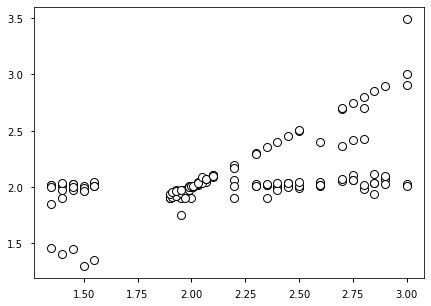

In [4]:
plt.figure(figsize=(7,5))
plt.scatter(X, Y, s=64, c='w', edgecolors='k', linewidth=1.0)
plt.show()

In [5]:
import mlgrad
import mlgrad.model as ml_model
import mlgrad.risk as ml_risk
import mlgrad.loss as ml_loss
import mlgrad.weights as ml_weights
import mlgrad.func as ml_func
import mlgrad.af as ml_af

In [6]:
layer = ml_model.GeneralModelLayer(1)
linmod1 = ml_model.LinearModel(1)
linmod2 = ml_model.LinearModel(1)
layer.append(linmod1)
layer.append(linmod2)
nn = ml_model.FFNetworkModel()
nn.add(layer)

nn.allocate()
nn.init_param()

In [7]:
minloss = ml_loss.SoftMinLoss(ml_loss.ErrorLoss(ml_func.SoftAbs(0.001)), 2, a=15)
risk = ml_risk.ER21(X.reshape(-1,1), Y, nn, minloss)

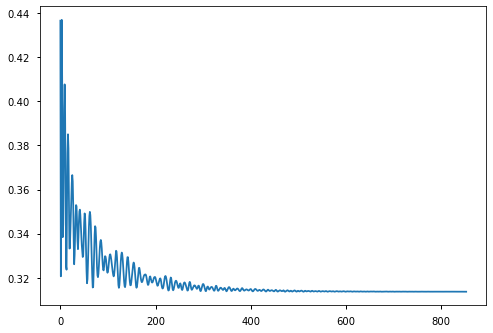

In [20]:
alg = mlgrad.erm_fg(risk, n_restart=1, h=0.01)

plt.plot(alg.lvals)
plt.show()

In [21]:
print(np.array(linmod1.param))
print(np.array(linmod2.param))
alg.K

[1.95818169 0.02564039]
[0.00355035 0.99861296]


853

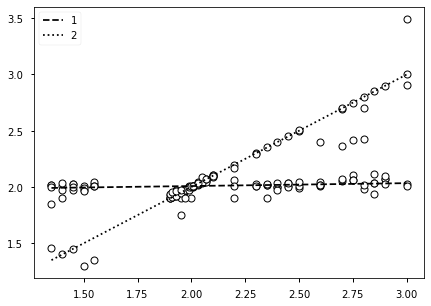

In [22]:
plt.figure(figsize=(7,5))
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.0)
XX = np.array([X.min(), X.max()])
XXs = XX.reshape(-1,1)
plt.plot(XX, linmod1.evaluate_all(XXs), linestyle='--', label='1', color='k')
plt.plot(XX, linmod2.evaluate_all(XXs), linestyle=':', label='2', color='k')
plt.legend()
plt.show()

In [23]:
layer_rob = ml_model.GeneralModelLayer(1)
rob_linmod1 = ml_model.LinearModel(1)
rob_linmod2 = ml_model.LinearModel(1)
layer_rob.append(rob_linmod1)
layer_rob.append(rob_linmod2)
nn_rob = ml_model.FFNetworkModel()
nn_rob.add(layer_rob)

nn_rob.allocate()
nn_rob.init_param()


In [24]:
minloss = ml_loss.SoftMinLoss(ml_loss.ErrorLoss(ml_func.SoftAbs(0.001)), 2, a=15)
rob_risk = ml_risk.ER21(X.reshape(-1,1), Y, nn_rob, minloss)
agg_func = ml_af.averaging_function("WM", alpha=0.97)
weights_tone = ml_weights.MWeights(agg_func, rob_risk)

3.151267215669996


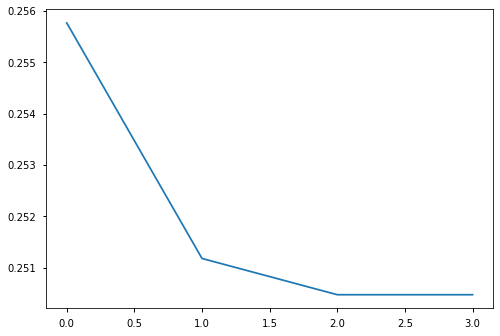

In [25]:
fg_tone = mlgrad.fg(rob_risk, h=0.01, tol=1.0e-8)
rob_alg = mlgrad.erm_irgd(fg_tone, weights_tone)

plt.plot(rob_alg.lvals)
plt.show()

In [26]:
print(np.array(rob_linmod1.param))
print(np.array(rob_linmod2.param))
rob_alg.K

[-5.63608089e-04  1.00023355e+00]
[1.96267393 0.02321956]


3

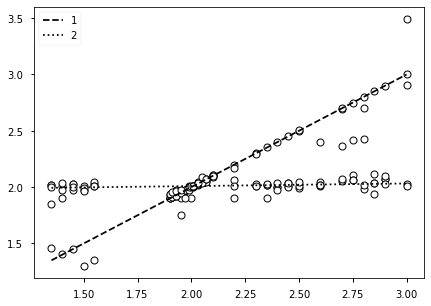

In [27]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,12))
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.0)
# plt.title("Соотношения тонов")
plt.plot(XX, rob_linmod1.evaluate_all(XXs), linestyle='--', label='1', color='k')
plt.plot(XX, rob_linmod2.evaluate_all(XXs), linestyle=':', label='2', color='k')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
# plt.xlabel('Фактическое соотношение тонов')
# plt.ylabel('Воспринимаемое соотношение тонов')
# plt.ylim(1.2, 3.1)
# plt.xlim(1.2, 3.1)
plt.legend()
# plt.savefig('fig/tonedata_scatter.eps')
plt.show()

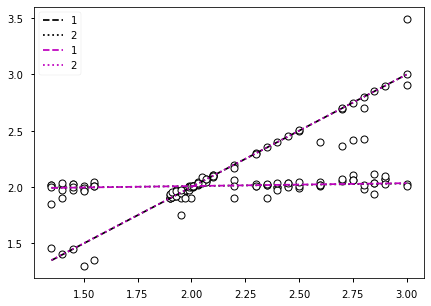

In [28]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,12))
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.0)
# plt.title("Соотношения тонов")
plt.plot(XX, rob_linmod1.evaluate_all(XXs), linestyle='--', label='1', color='k')
plt.plot(XX, rob_linmod2.evaluate_all(XXs), linestyle=':', label='2', color='k')
plt.plot(XX, linmod1.evaluate_all(XXs), linestyle='--', label='1', color='m')
plt.plot(XX, linmod2.evaluate_all(XXs), linestyle=':', label='2', color='m')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
# plt.xlabel('Фактическое соотношение тонов')
# plt.ylabel('Воспринимаемое соотношение тонов')
# plt.ylim(1.2, 3.1)
# plt.xlim(1.2, 3.1)
plt.legend()
# plt.savefig('fig/tonedata_scatter.eps')
plt.show()

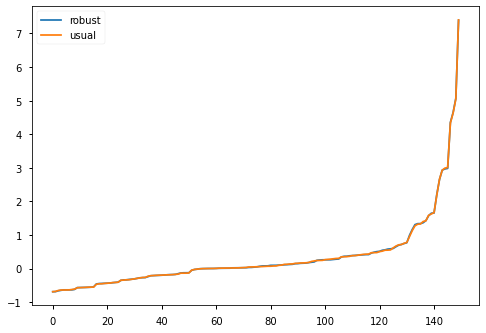

In [29]:
plt.plot(sorted(rob_risk.evaluate_losses()), label='robust')
plt.plot(sorted(risk.evaluate_losses()), label='usual')
plt.legend()
plt.show()